## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sun Jun 16 04:15:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yLGhnFRTrlTbg4wNfiDe")
project = rf.workspace("test-3e6ru").project("detect-9ohog")
version = project.version(3)
dataset = version.download("yolov8")




/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 10.3 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to detect-3 in yolov8:: 100%|██████████| 4818/4818 [00:01<00:00, 2808.38it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz= 1280,720 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 232MB/s]
New https://pypi.org/project/ultralytics/8.2.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/detect-3/data.yaml, epochs=20, patience=50, batch=16, imgsz=(1280, 720), save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1718443704.11f3baeac1c2.3390.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1310.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1311.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1312.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


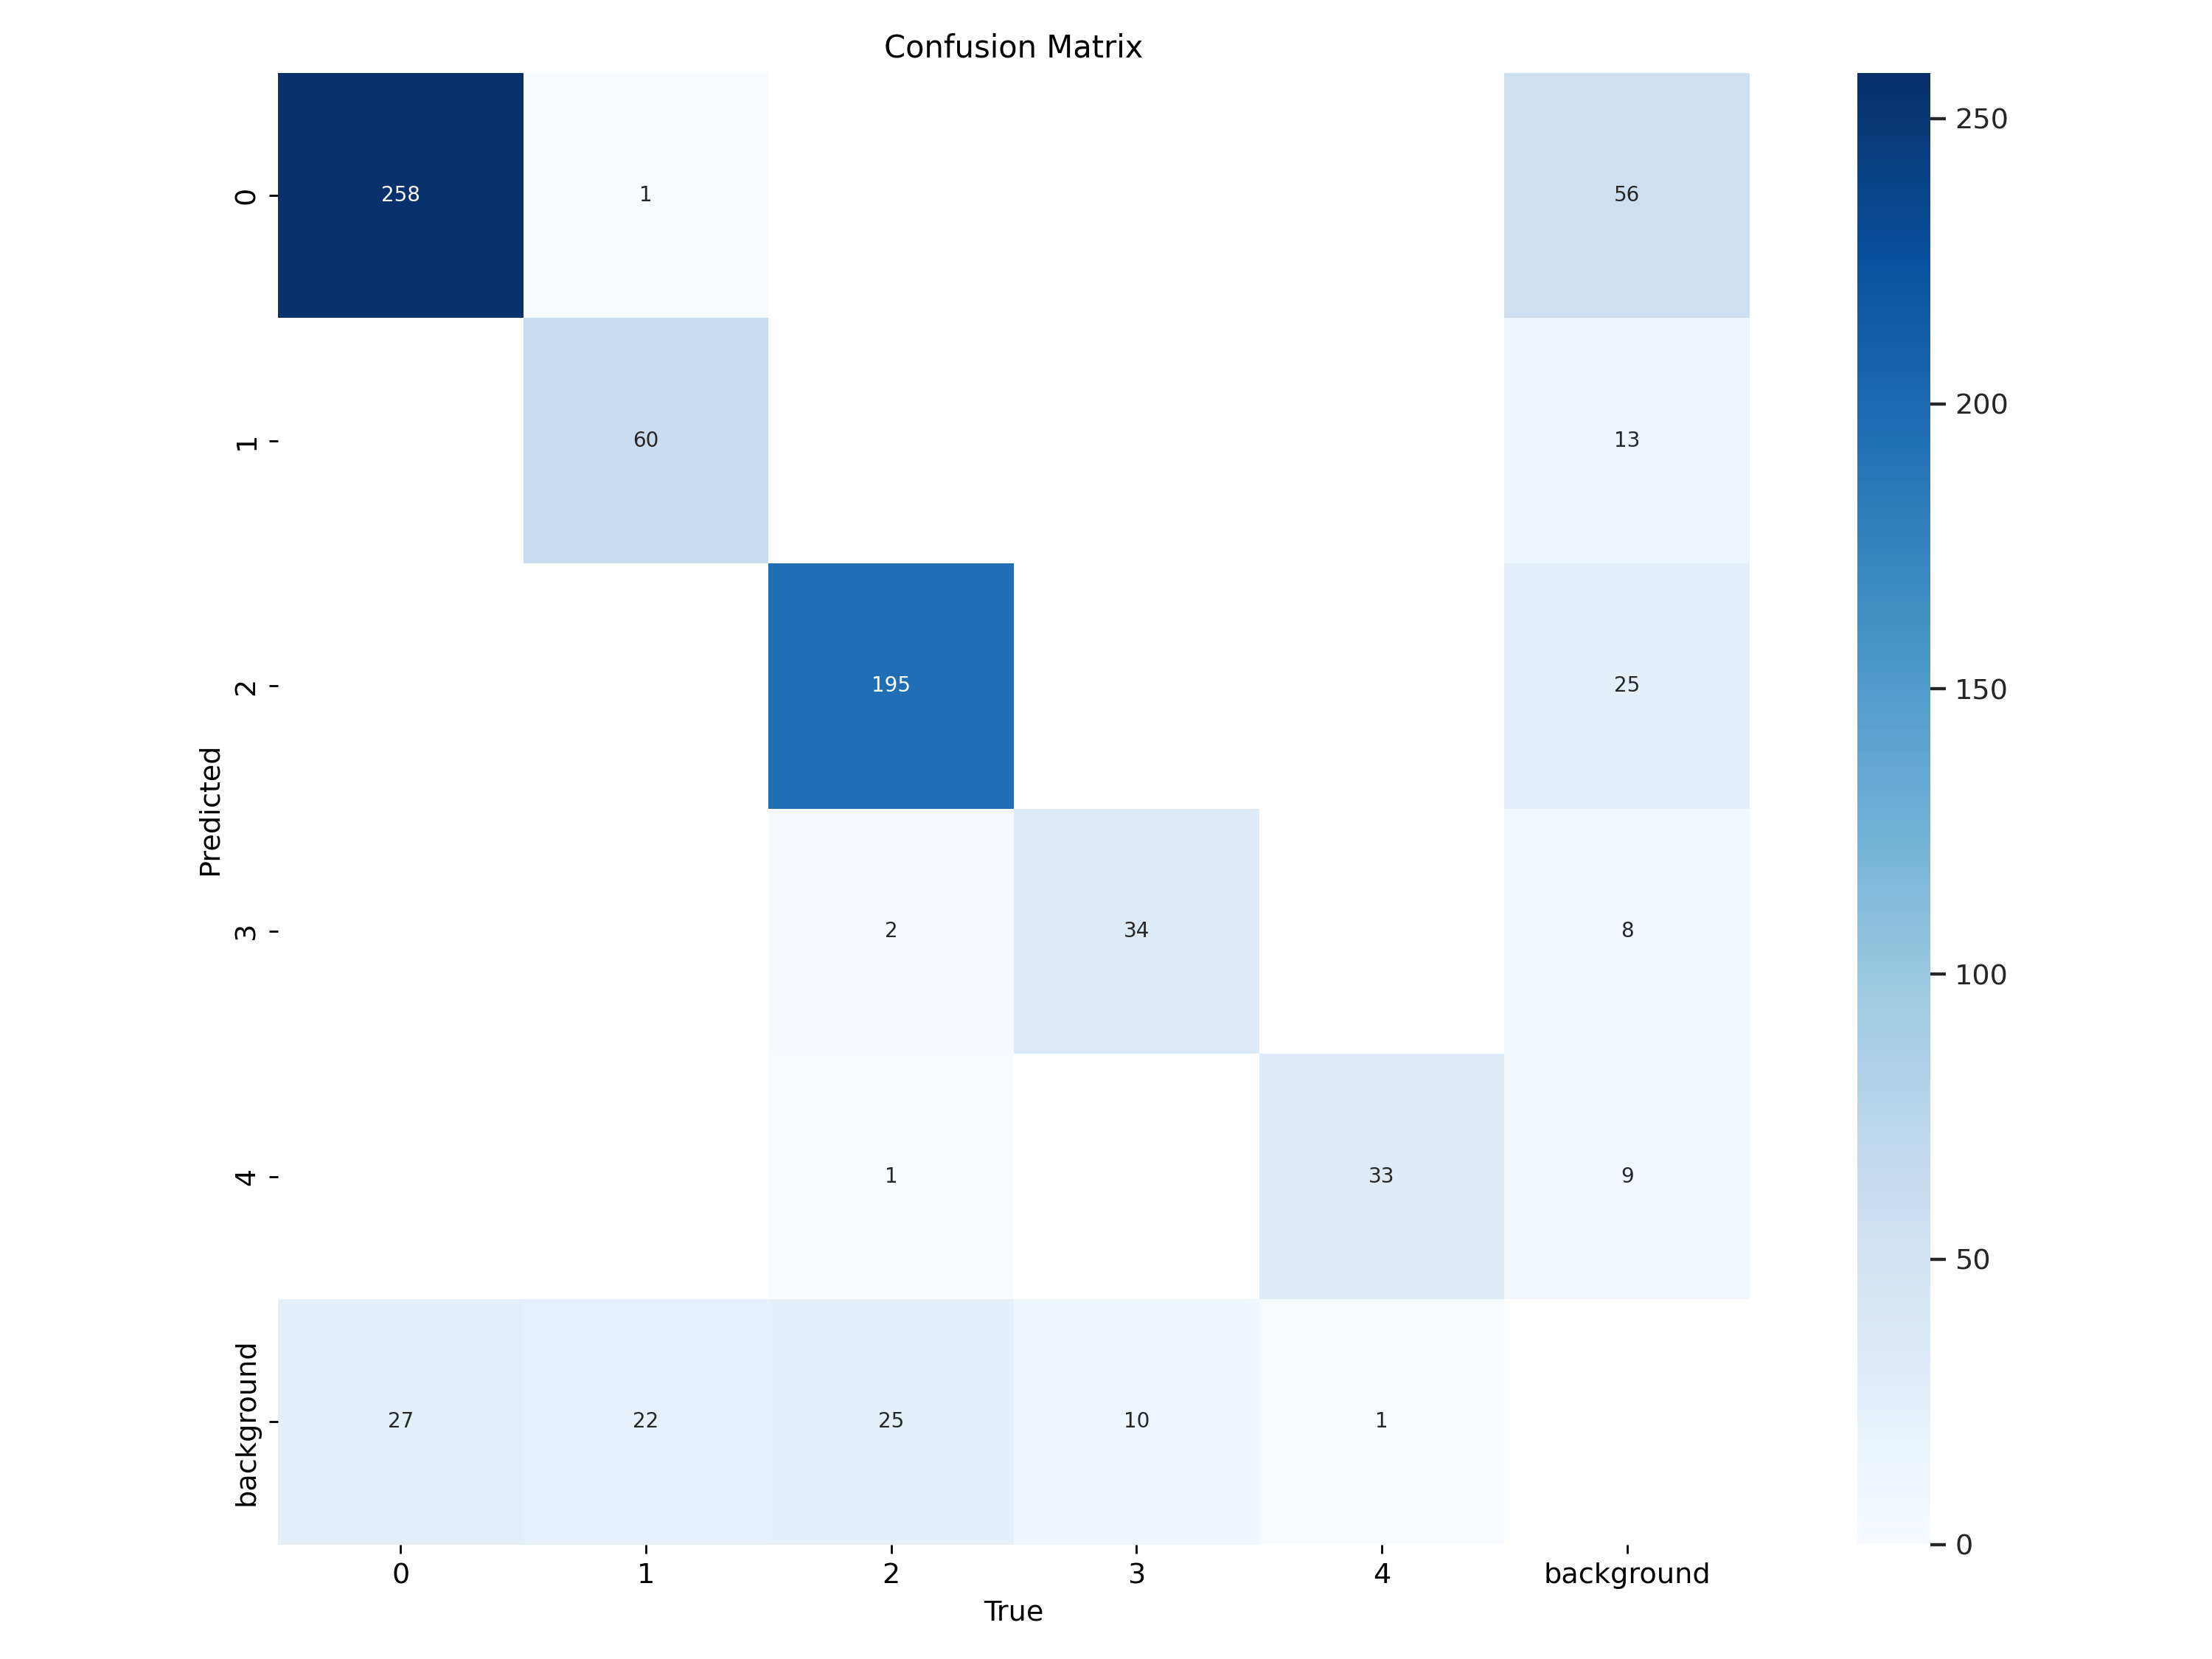

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


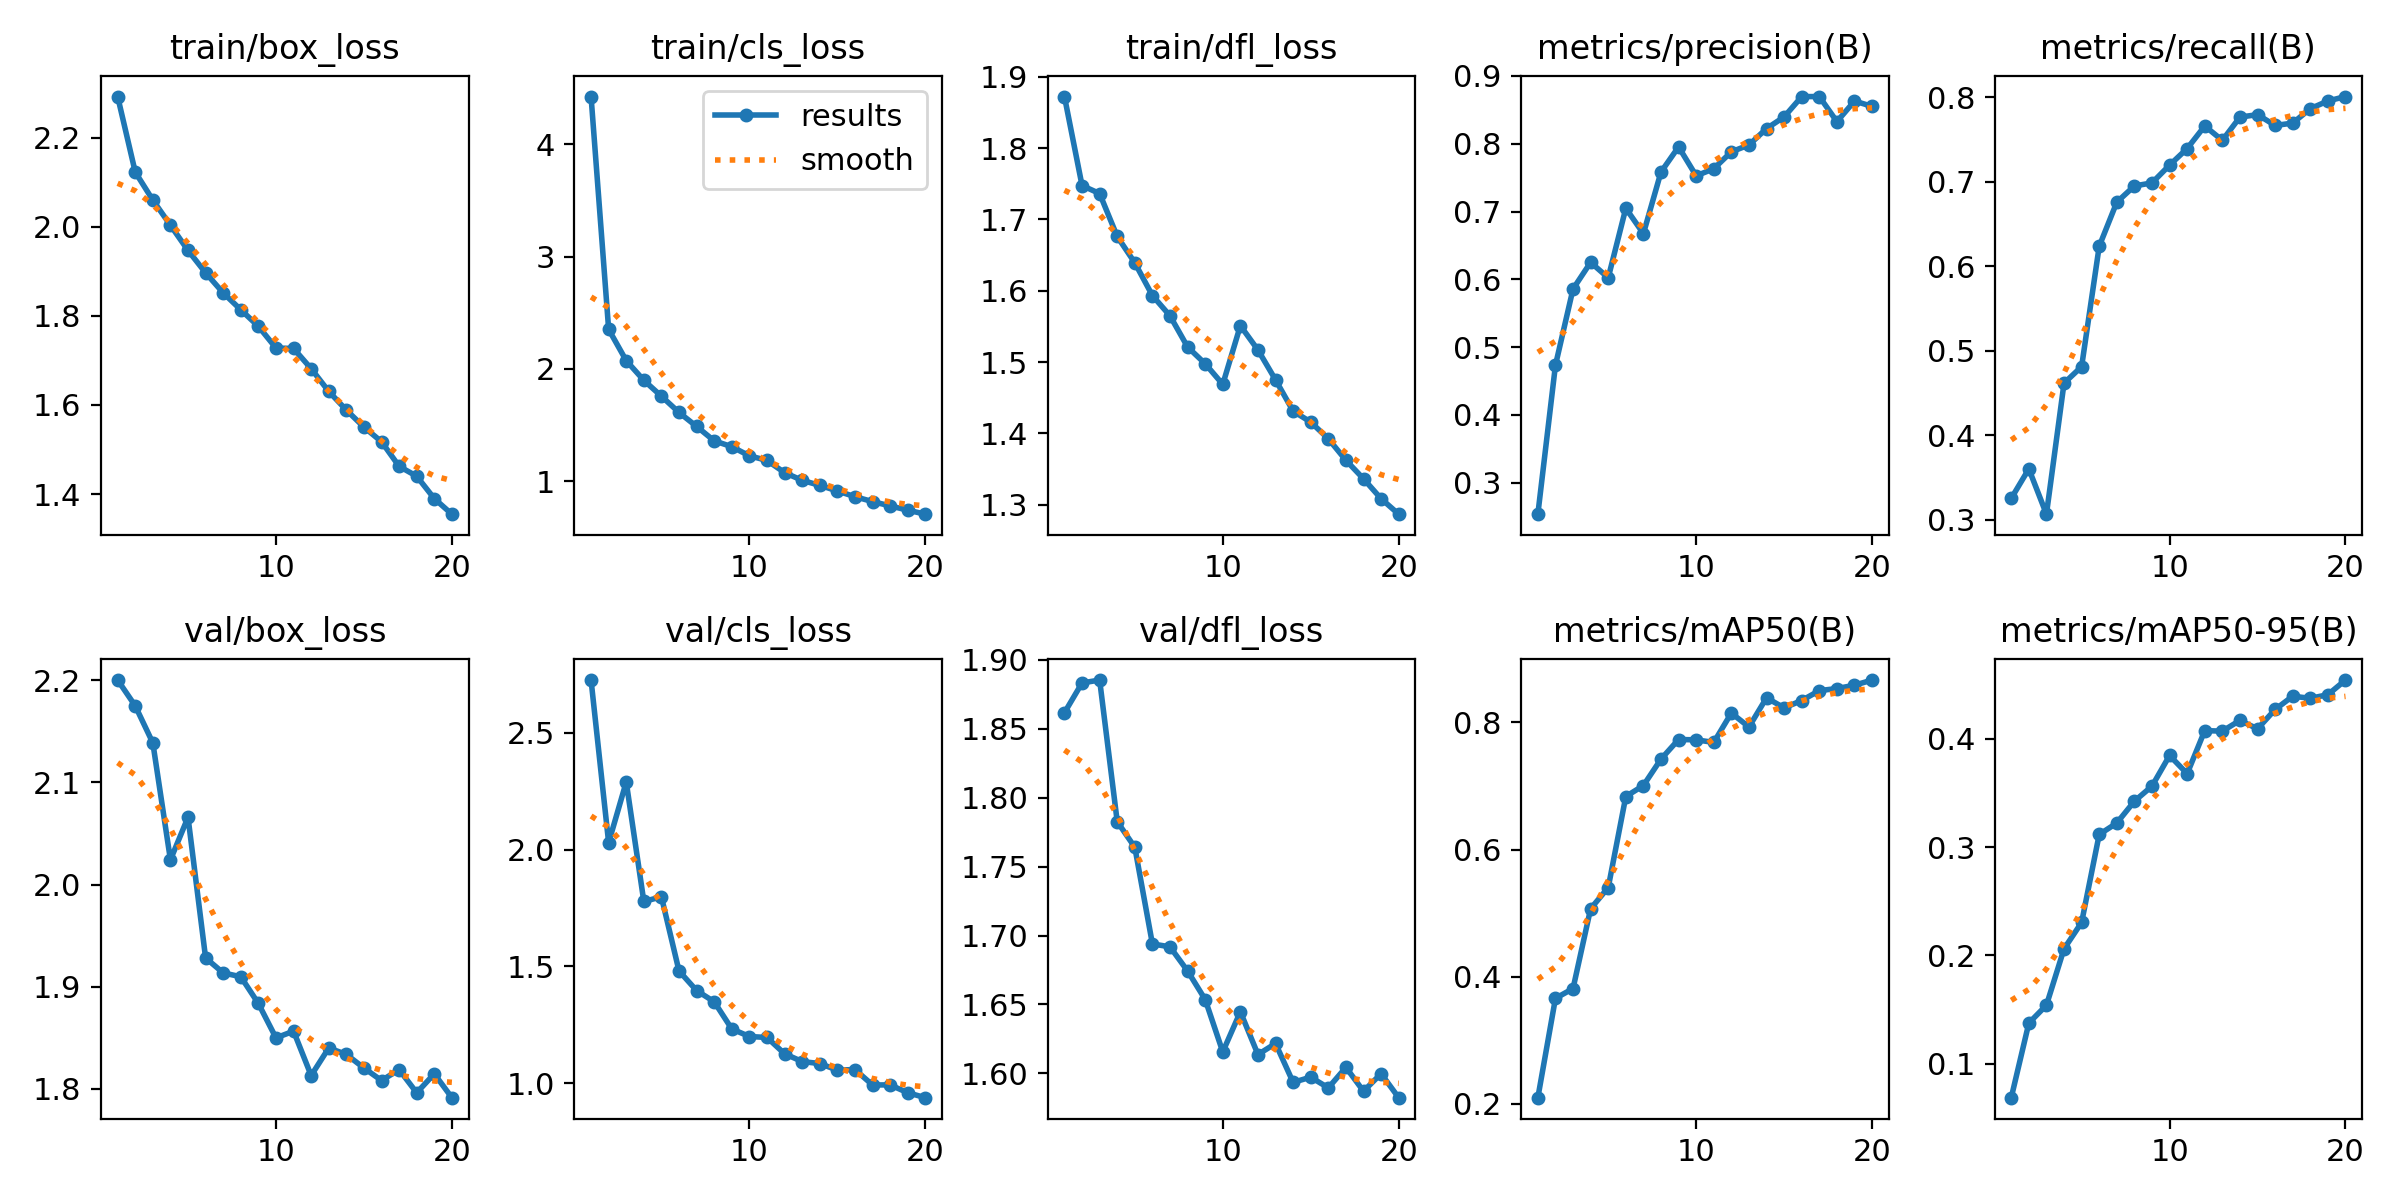

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


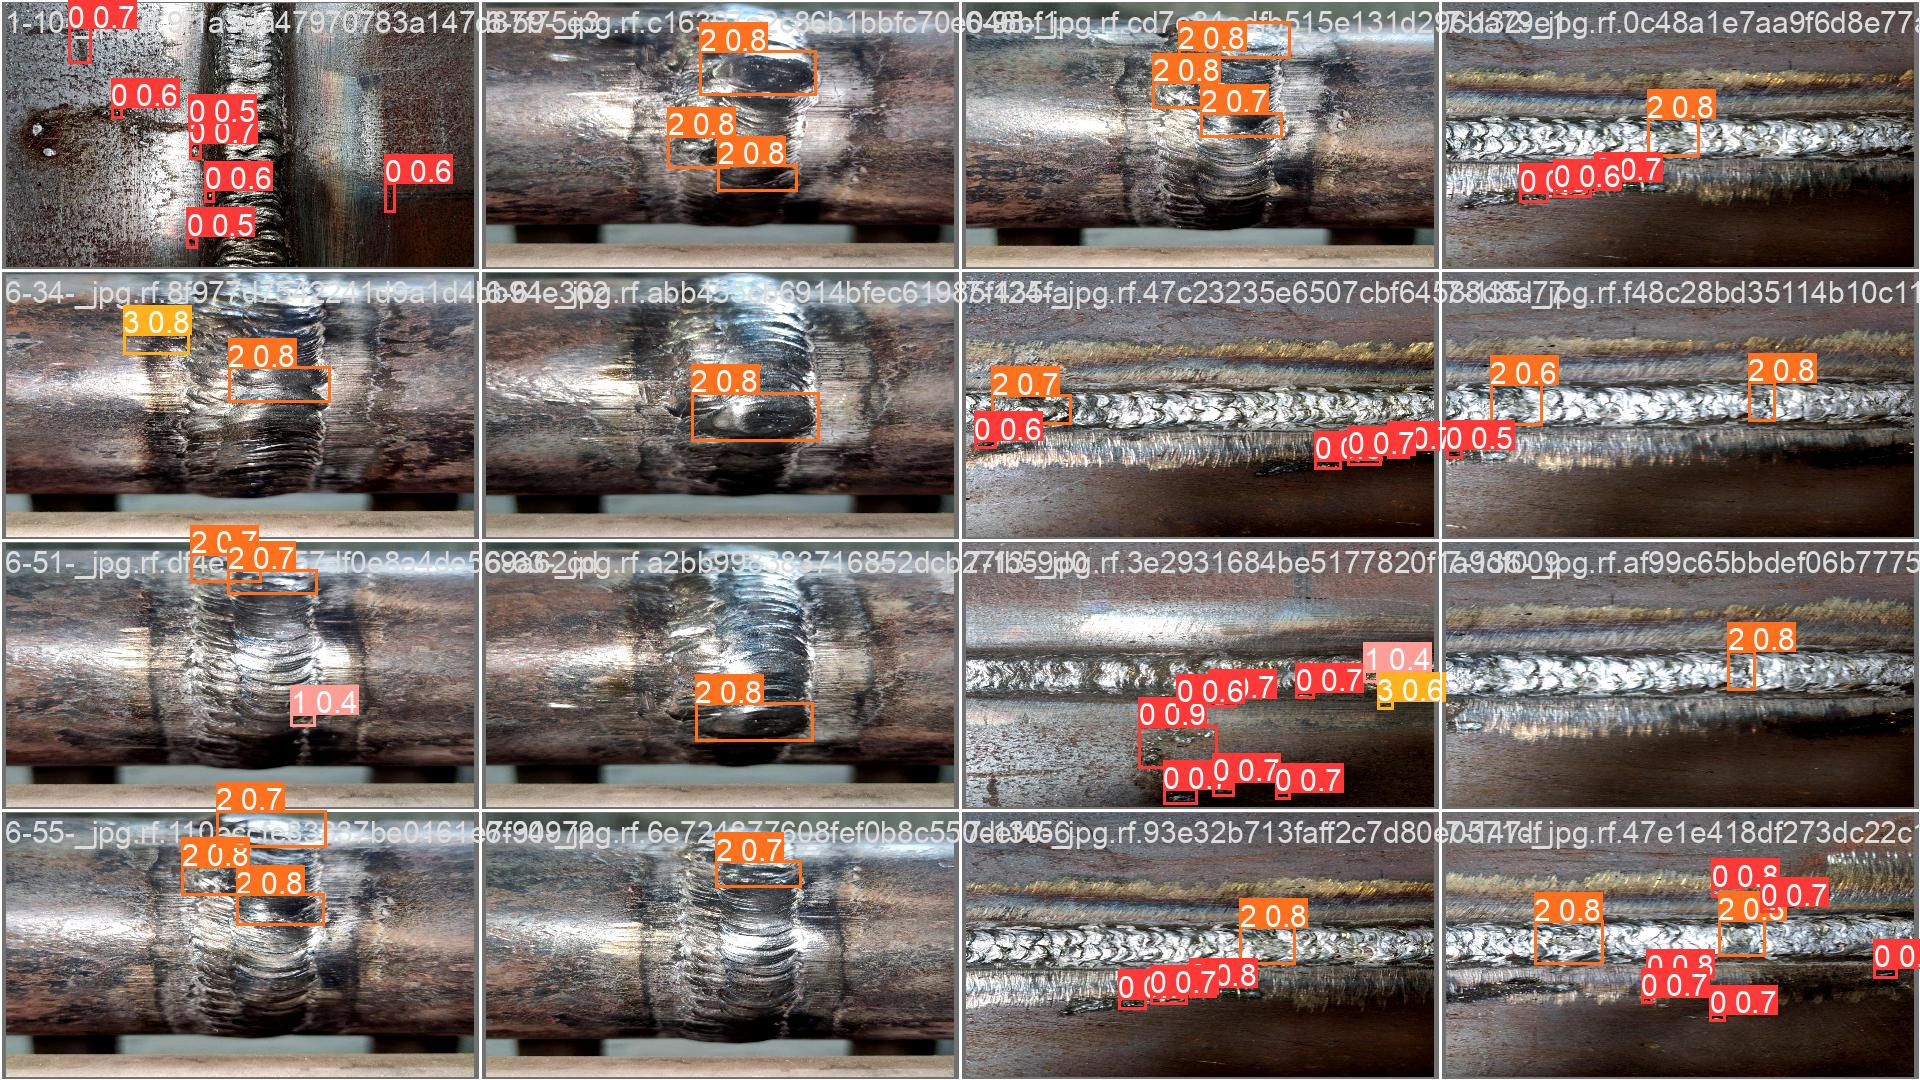

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1200)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/best1.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
100% 755k/755k [00:00<00:00, 4.07MB/s]
val: Scanning /content/datasets/detect-3/valid/labels... 203 images, 0 backgrounds, 0 corrupt: 100% 203/203 [00:00<00:00, 1926.33it/s]
val: New cache created: /content/datasets/detect-3/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:12<00:00,  1.07it/s]
                   all        203        669      0.857      0.854      0.879      0.459
                     0        203        285      0.829       0.87       0.86      0.362
                     1        203         83      0.802      0.685      0.767      0.412
                     2        203        223      0.888      0.879      0.907      0.514
                     3        203         44      0.859      0.864       0.89      0.407
       

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 420, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 97, in __init__
    self._load(model, task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 149, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 628, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 567, in torch_safe_load
    return torch.load(file, map_location='cpu'), file  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 997, in load
    with _open_file_like(f, 'rb') 

ТЕСТ

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 iou=0.5 source={dataset.location}/test/images save=True

## Inference with Custom Model

In [ ]:
!unzip test_dataset.zip

unzip:  cannot find or open test_dataset.zip, test_dataset.zip.zip or test_dataset.zip.ZIP.


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict save_txt=True model={HOME}/best1.pt conf=0.25 iou=0.5 source=/content/test save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/363 /content/test/0.jpg: 736x1280 (no detections), 84.5ms
image 2/363 /content/test/1 (1).jpg: 736x1280 (no detections), 29.4ms
image 3/363 /content/test/1 (101).jpg: 736x1280 (no detections), 29.4ms
image 4/363 /content/test/1 (102).jpg: 736x1280 (no detections), 29.3ms
image 5/363 /content/test/1 (103).jpg: 736x1280 (no detections), 28.2ms
image 6/363 /content/test/1 (104).jpg: 736x1280 (no detections), 28.2ms
image 7/363 /content/test/1 (107).jpg: 736x1280 (no detections), 28.2ms
image 8/363 /content/test/1 (108).jpg: 736x1280 (no detections), 28.2ms
image 9/363 /content/test/1 (109).jpg: 736x1280 (no detections), 20.6ms
image 10/363 /content/test/1 (110).jpg: 736x1280 (no detections), 20.6ms
image 11/363 /content/test/1 (13).jpg: 736x1280 (no detections), 20.8ms
image 12/363 /content/test/1 (14).jp

In [ ]:
import pandas as pd
import os

# Путь к папке с файлами
folder_path = '/content/runs/detect/predict/labels/'

# Создаем пустой DataFrame
df = pd.DataFrame(columns=[
  "filename",
  "class_id",
  "rel_x",
  "rel_y",
  "width",
  "height"
])

# Перебираем все файлы в папке
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    # Проверяем, не является ли файл пустым
    if os.path.isfile(file_path) and os.path.getsize(file_path) > 0:
        with open(file_path, 'r') as file:
            content = file.readlines()
            print(content)

        for line in content:
            values = line.strip().split(' ')
            df.loc[ len(df.index )] = [filename.split('.')[0] + '.jpg', values[0], values[1],  values[2], values[3],  values[4]]

df.head(10)

['1 0.12902 0.801284 0.0273108 0.0475823\n']
['0 0.0734848 0.705148 0.0283645 0.0551884\n']
['0 0.616146 0.81062 0.038523 0.0516567\n']
['3 0.951163 0.606253 0.0976733 0.104175\n']
['0 0.919007 0.680322 0.103591 0.0724632\n']
['0 0.735655 0.733638 0.097008 0.0801218\n']
['0 0.451737 0.727325 0.0363974 0.0634296\n']
['0 0.663958 0.640459 0.0366876 0.0493933\n', '0 0.758727 0.53848 0.0883789 0.0410283\n']
['2 0.94278 0.403602 0.0928726 0.119968\n', '3 0.562148 0.376975 0.02338 0.0249261\n']
['0 0.483093 0.26384 0.0234805 0.150423\n']
['3 0.620053 0.340765 0.0218889 0.0226347\n']
['3 0.606259 0.450944 0.0591296 0.0664467\n']
['0 0.406747 0.762058 0.0293531 0.168546\n', '0 0.494247 0.742568 0.0290741 0.180594\n']
['0 0.111342 0.641531 0.023132 0.0442255\n']
['0 0.449508 0.971796 0.0253916 0.0395727\n', '0 0.523477 0.968488 0.0290173 0.0346076\n', '0 0.531175 0.693039 0.0286806 0.190916\n']
['0 0.483348 0.438643 0.0211545 0.145094\n']
['0 0.516895 0.820157 0.0262583 0.13221\n']
['0 0.106748

filename class_id      rel_x     rel_y      width     height
0   3 (42).jpg        1    0.12902  0.801284  0.0273108  0.0475823
1   3 (79).jpg        0  0.0734848  0.705148  0.0283645  0.0551884
2  3 (105).jpg        0   0.616146   0.81062   0.038523  0.0516567
3   3 (72).jpg        3   0.951163  0.606253  0.0976733   0.104175
4  3 (114).jpg        0   0.919007  0.680322   0.103591  0.0724632
5  3 (108).jpg        0   0.735655  0.733638   0.097008  0.0801218
6   3 (92).jpg        0   0.451737  0.727325  0.0363974  0.0634296
7  3 (159).jpg        0   0.663958  0.640459  0.0366876  0.0493933
8  3 (159).jpg        0   0.758727   0.53848  0.0883789  0.0410283
9  3 (119).jpg        2    0.94278  0.403602  0.0928726   0.119968

In [ ]:
df.to_csv("sumbission.csv", index=False, sep=";")

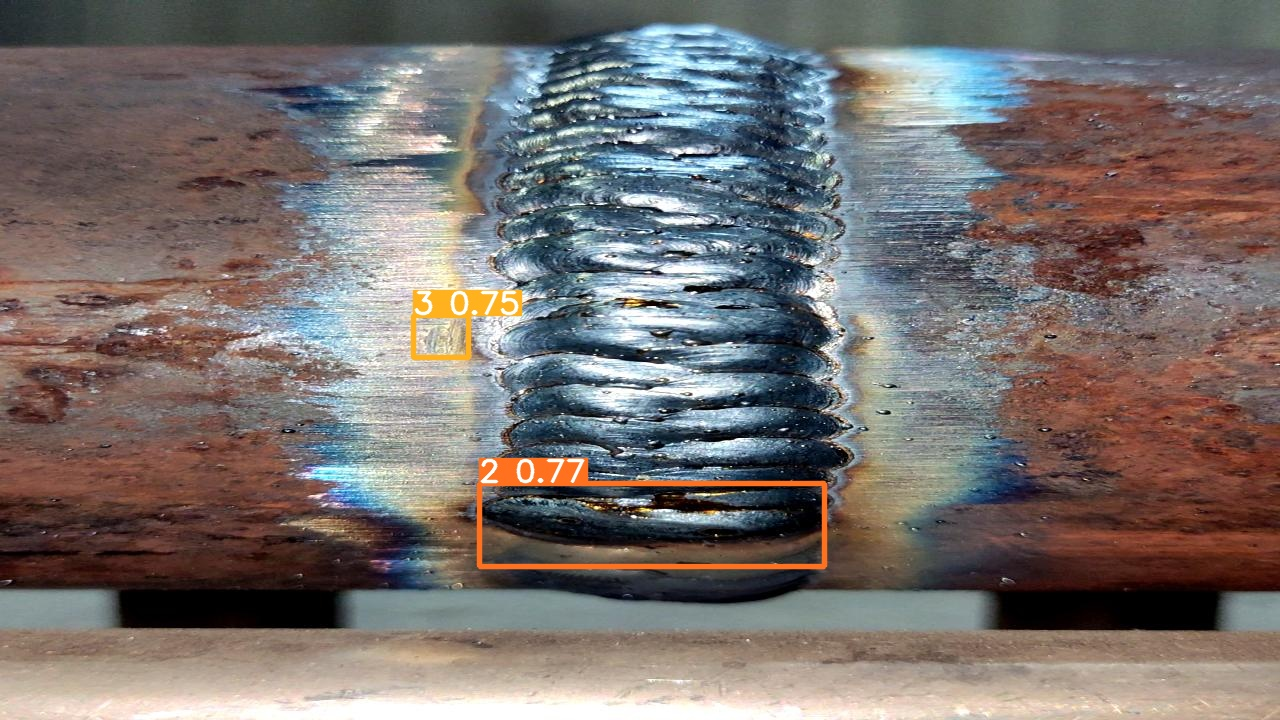

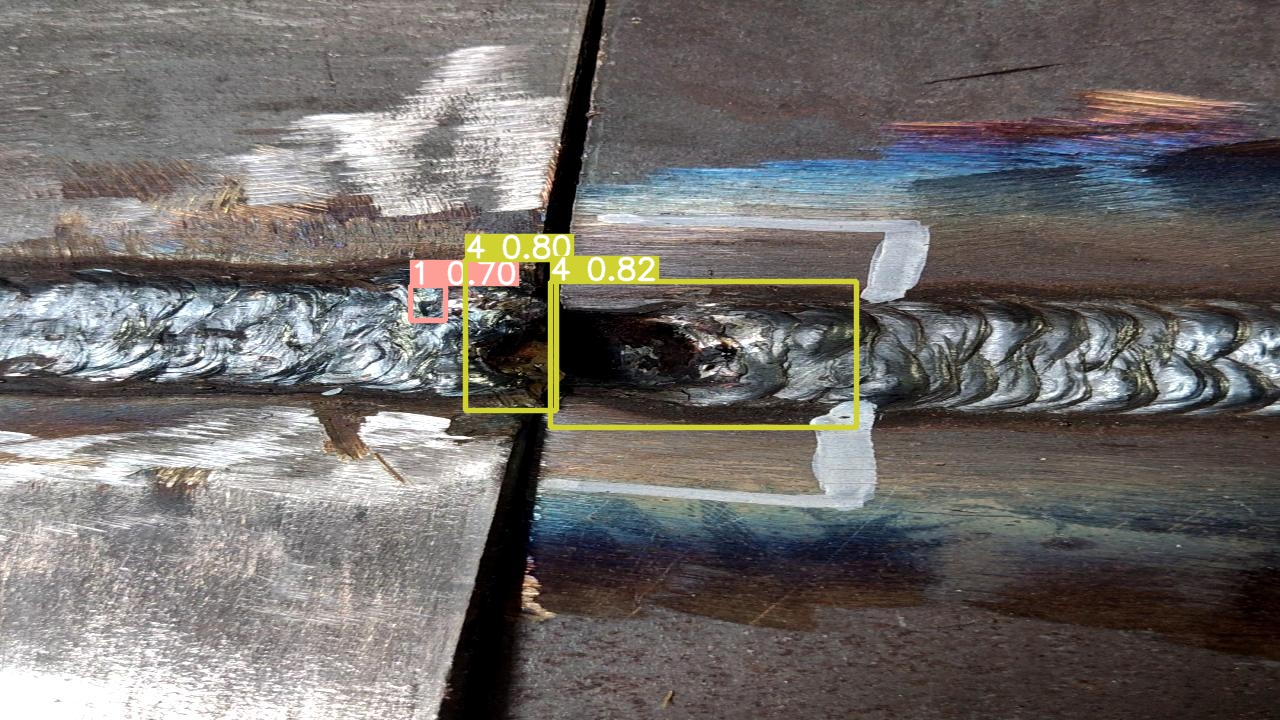

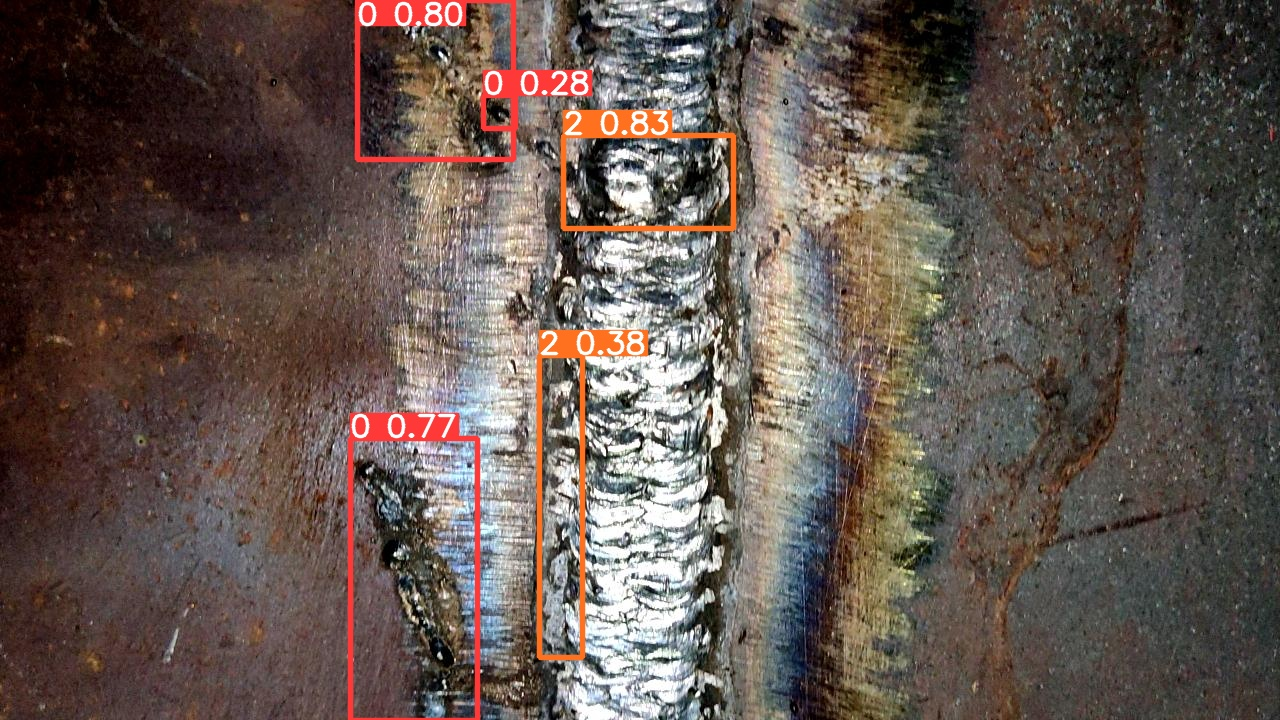

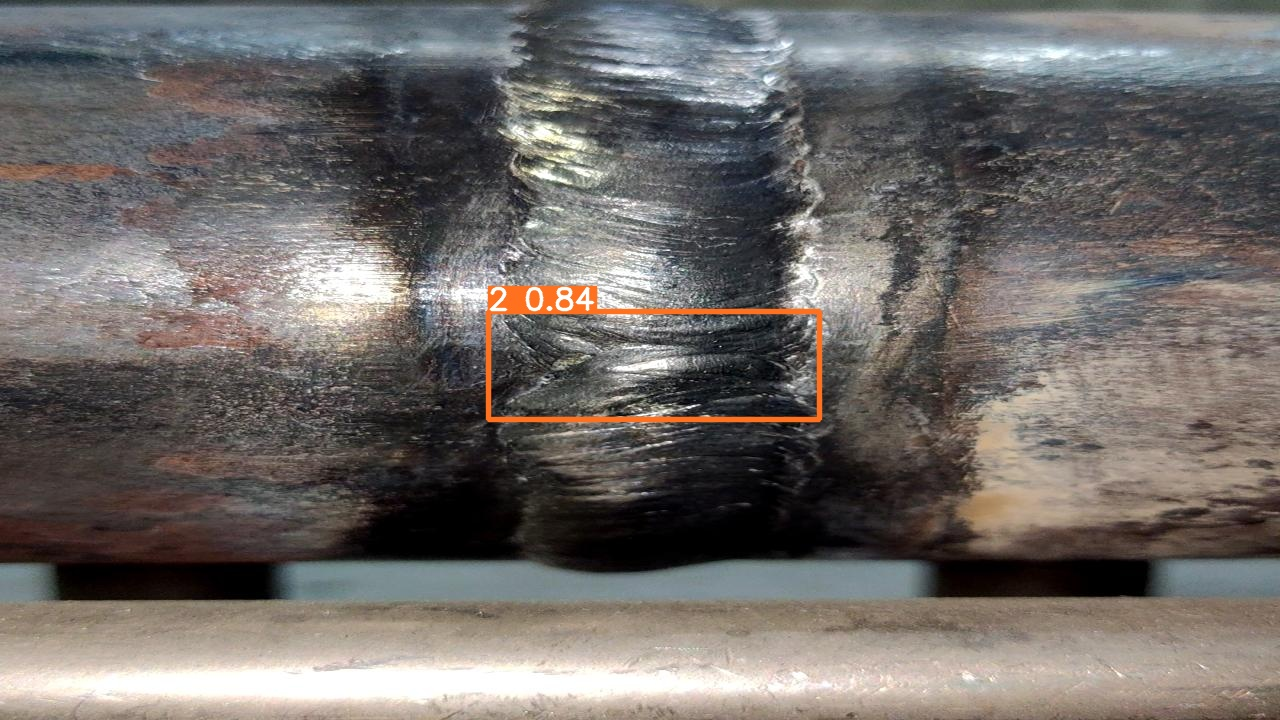

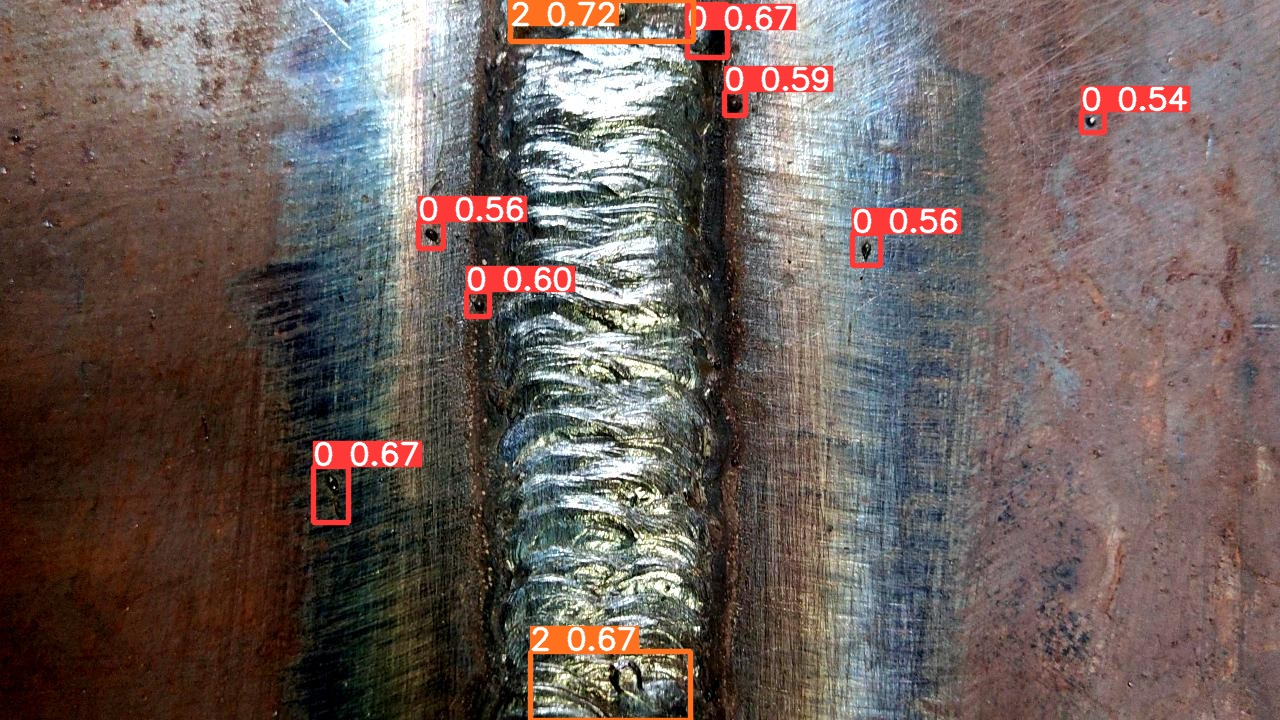

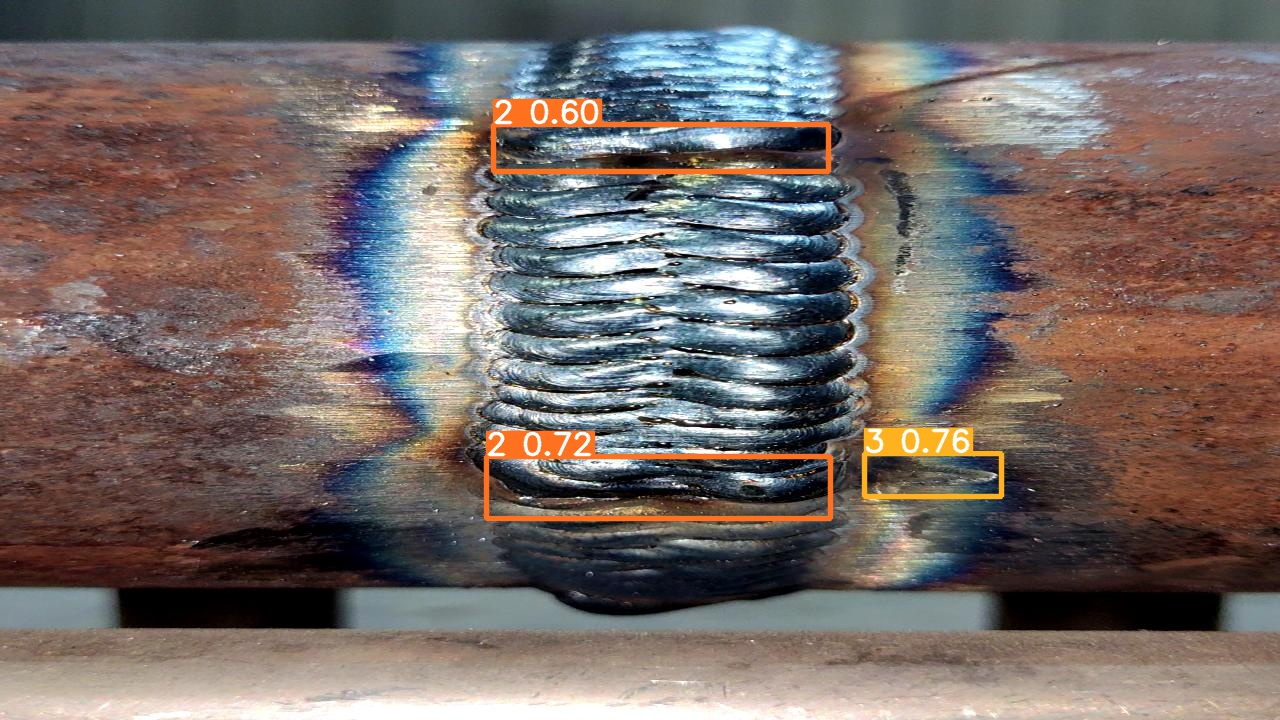

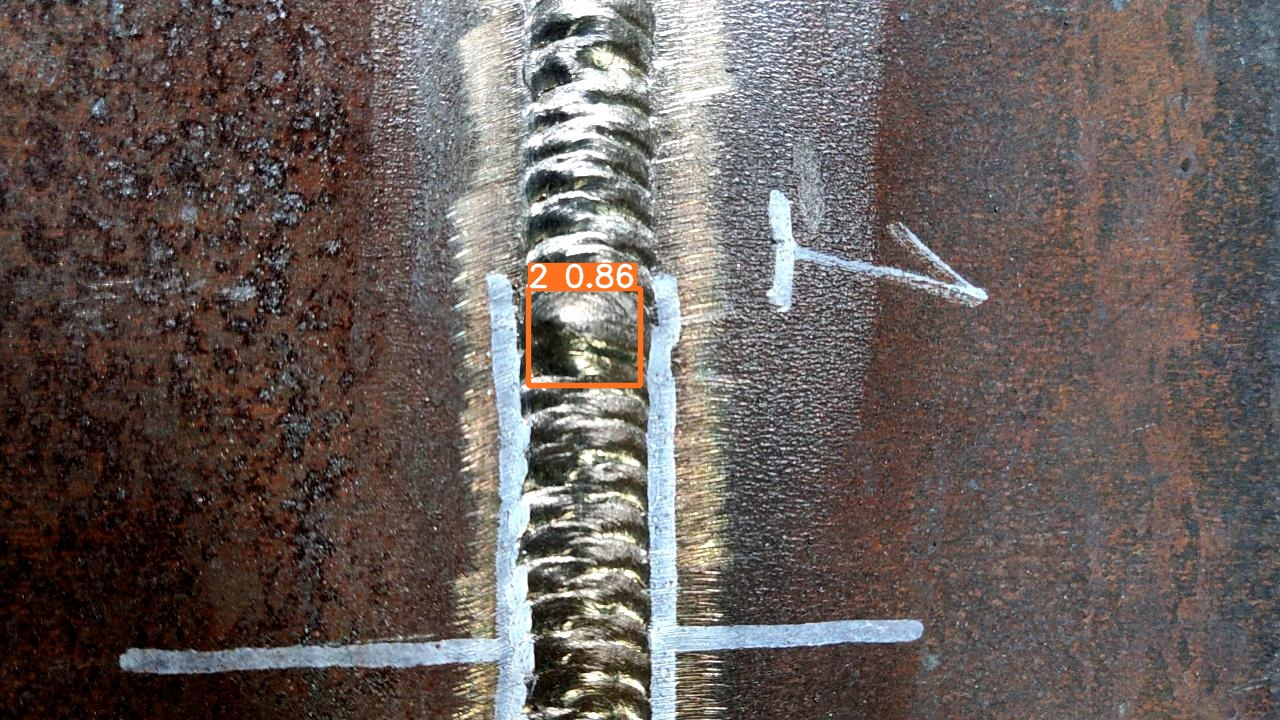

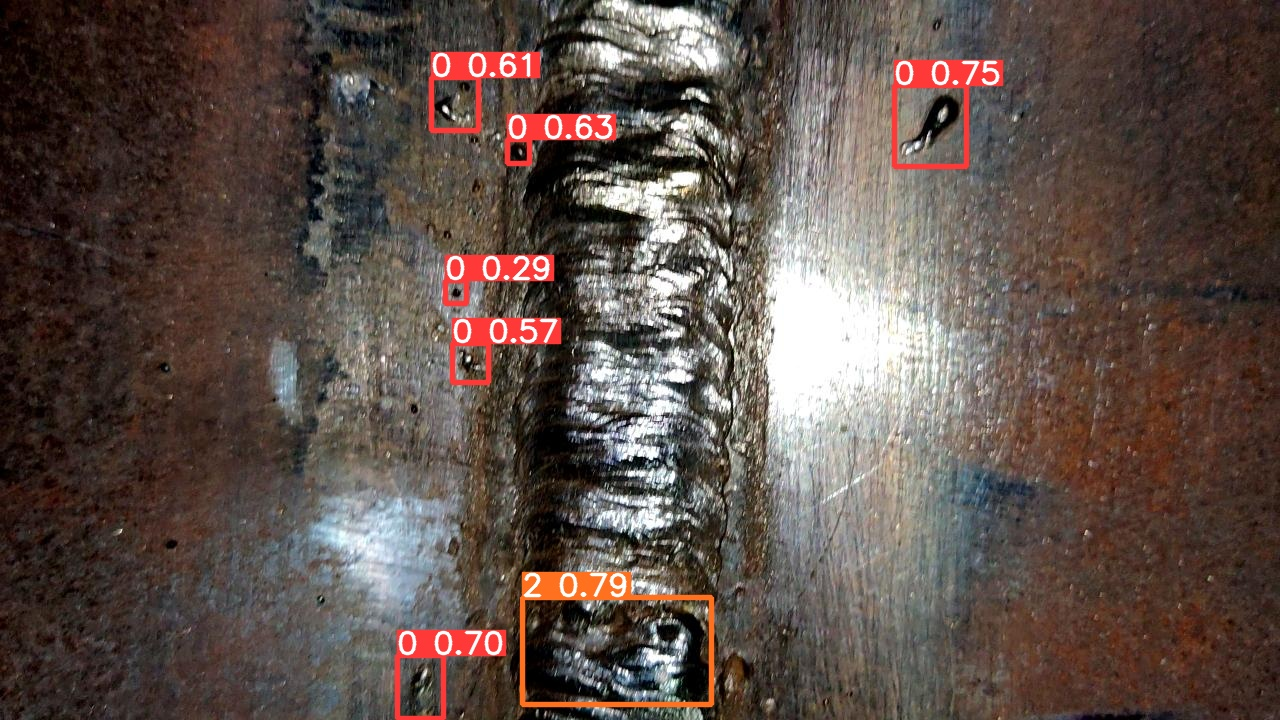

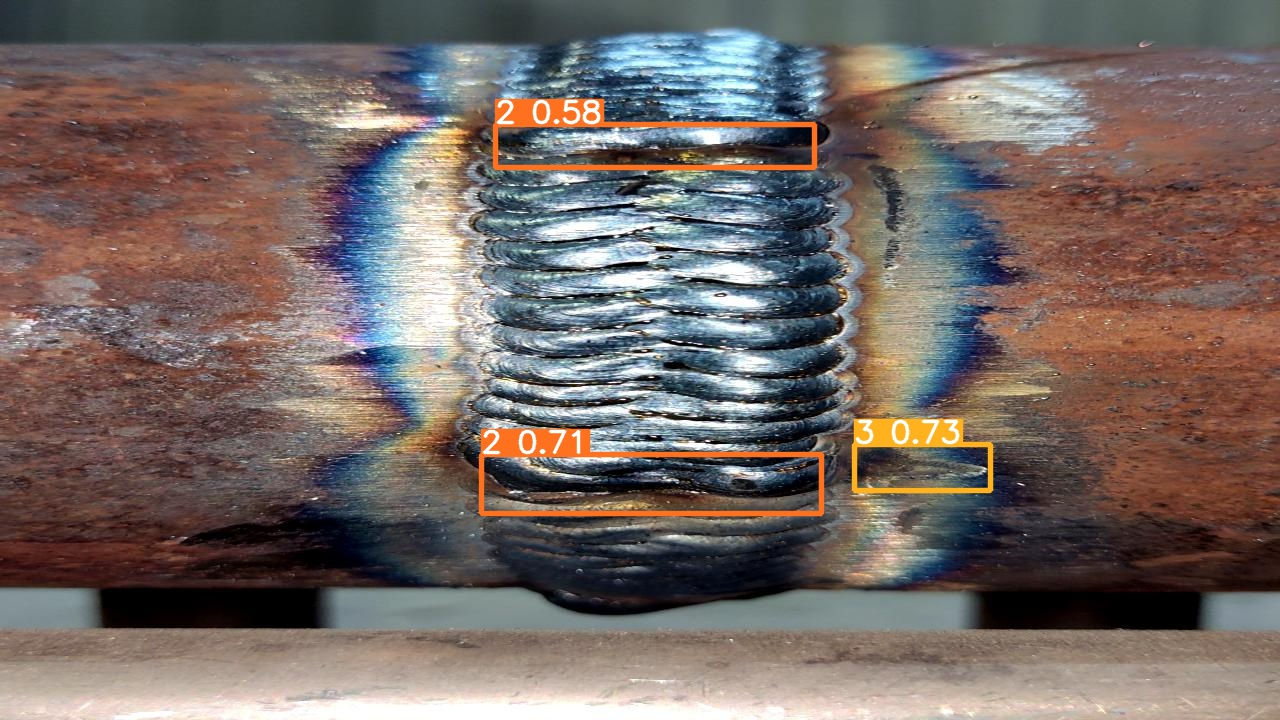

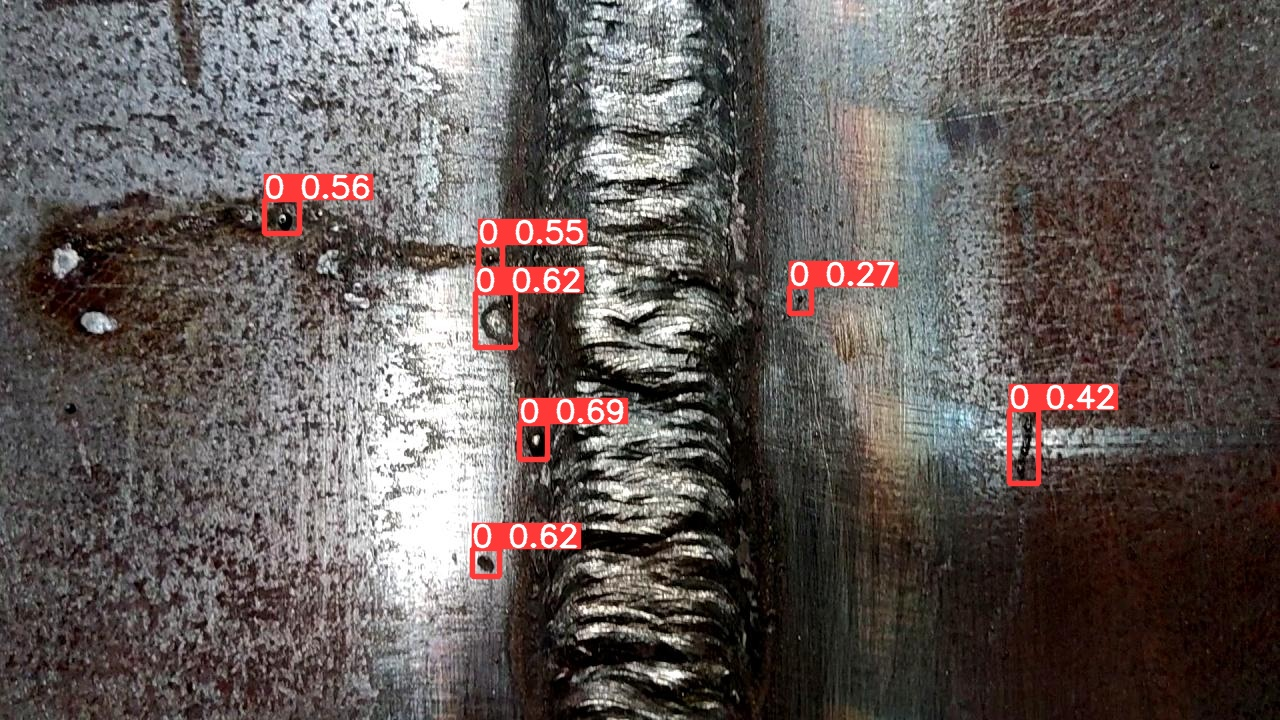

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")